<a href="https://colab.research.google.com/github/VD-art/cfa-curriculum-python/blob/main/notebooks/quant/08_tvm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📍 Lesson 2 – Time Value of Money (TVM)

- Single sum: PV & FV
- Ordinary annuity: PV & FV
- Uneven cash flows: PV


In [1]:
# Step 1: Clone your repo
!git clone https://github.com/VD-art/cfa-curriculum-python.git

# Step 2: Install required packages
!pip install -r /content/cfa-curriculum-python/requirements.txt

# Step 3: Add repo to Python path
import sys
sys.path.append('/content/cfa-curriculum-python')


Cloning into 'cfa-curriculum-python'...
remote: Enumerating objects: 158, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (126/126), done.
remote: Total 158 (delta 53), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (158/158), 126.31 KiB | 2.38 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [2]:
from scripts.quant.tvm import (
    future_value, present_value,
    future_value_annuity, present_value_annuity,
    present_value_uneven_cash_flows
)

In [3]:
import pandas as pd

df = pd.read_csv('/content/cfa-curriculum-python/data/quant/cash_flows.csv')
print(df)


   period  cash_flow
0       1        100
1       2        150
2       3        200
3       4        250


In [4]:
pv = 1000
rate = 0.05
n = 3

fv = future_value(pv, rate, n)
print(f"Future value of ₹1000 in 3 years at 5%: {fv:.2f}")

fv_target = 1150
pv_calc = present_value(fv_target, rate, n)
print(f"Present value needed today to get ₹1150 in 3 years: {pv_calc:.2f}")


Future value of ₹1000 in 3 years at 5%: 1157.63
Present value needed today to get ₹1150 in 3 years: 993.41


In [5]:
payment = 500
n = 4

fv_ann = future_value_annuity(payment, rate, n)
pv_ann = present_value_annuity(payment, rate, n)

print(f"Future value of annuity: {fv_ann:.2f}")
print(f"Present value of annuity: {pv_ann:.2f}")


Future value of annuity: 2155.06
Present value of annuity: 1772.98


In [6]:
cash_flows = list(zip(df['cash_flow'], df['period']))
pv_uneven = present_value_uneven_cash_flows(cash_flows, rate)

print(f"Present value of uneven cash flows at 5%: {pv_uneven:.2f}")


Present value of uneven cash flows at 5%: 609.74


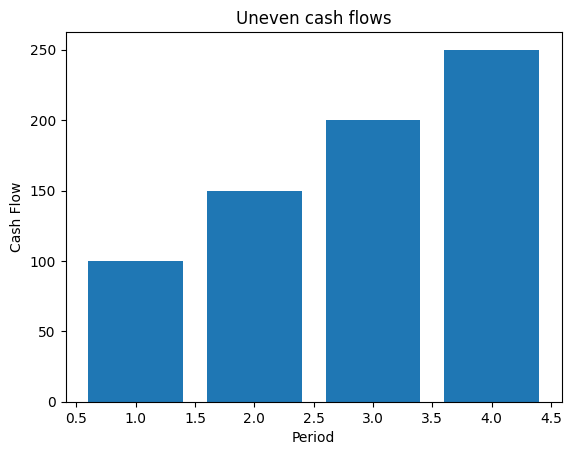

In [7]:
import matplotlib.pyplot as plt

plt.bar(df['period'], df['cash_flow'])
plt.xlabel('Period')
plt.ylabel('Cash Flow')
plt.title('Uneven cash flows')
plt.show()
